<a href="https://colab.research.google.com/github/Shifatasmiah/Plant-disease-detection/blob/main/Plant_disease_detection_software_TL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import keras
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras import datasets, layers, models

from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(

     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory('/content/drive/MyDrive/plant_dataset/Train',
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory('/content/drive/MyDrive/plant_dataset/Val',
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory('/content/drive/MyDrive/plant_dataset/Test',
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 4031 images belonging to 8 classes.
Found 1406 images belonging to 8 classes.
Found 1406 images belonging to 8 classes.


In [ ]:
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(
    include_top=False, weights='imagenet',input_shape = (224, 224, 3)
)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(.2)(x)
predictions = Dense(train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = True

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()





Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [ ]:
r = model.fit(train, epochs=15, validation_data=(
   validation), validation_steps = 25)


Epoch 1/15
126/126 [==============================] - 748s 6s/step - loss: 0.2663 - accuracy: 0.9246 - val_loss: 199.8721 - val_accuracy: 0.0000e+00
Epoch 2/15
126/126 [==============================] - 92s 729ms/step - loss: 0.0792 - accuracy: 0.9784 - val_loss: 5.6628 - val_accuracy: 0.3600
Epoch 3/15
126/126 [==============================] - 92s 730ms/step - loss: 0.0594 - accuracy: 0.9821 - val_loss: 9.1201 - val_accuracy: 0.2400
Epoch 4/15
126/126 [==============================] - 92s 729ms/step - loss: 0.0527 - accuracy: 0.9854 - val_loss: 1.2083 - val_accuracy: 0.6000
Epoch 5/15
126/126 [==============================] - 93s 731ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 1.2902 - val_accuracy: 0.8000
Epoch 6/15
126/126 [==============================] - 92s 729ms/step - loss: 0.0501 - accuracy: 0.9859 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 7/15
126/126 [==============================] - 92s 730ms/step - loss: 0.0665 - accuracy: 0.9806 - val_loss: 1.1245 - va

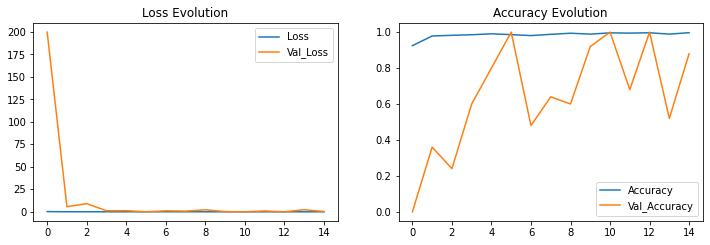

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.savefig("TL2_Graph.png")

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")



evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

1406/1406 [==============================] - 260s 185ms/step - loss: 0.0612 - accuracy: 0.9844
Test Accuracy: 98.44%
126/126 [==============================] - 70s 554ms/step - loss: 0.0119 - accuracy: 0.9965
Train Accuracy: 99.65%


In [ ]:
from keras.utils.np_utils import to_categorical
num_classes=len(test.class_indices)

test_labels = test.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
test_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report



pred = model.predict(test)


y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)
print(test_labels)

cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


,0,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg
precision,1.000000,0.856115,1.0,1.000000,0.989691,1.0,1.000000,0.993750,0.98293,0.979944,0.984898
recall,0.846774,0.991667,1.0,0.988372,1.000000,1.0,0.990000,1.000000,0.98293,0.977102,0.982930
f1-score,0.917031,0.918919,1.0,0.994152,0.994819,1.0,0.994975,0.996865,0.98293,0.977095,0.982916
support,124.000000,120.000000,236.0,86.000000,192.000000,30.0,300.000000,318.000000,0.98293,1406.000000,1406.000000


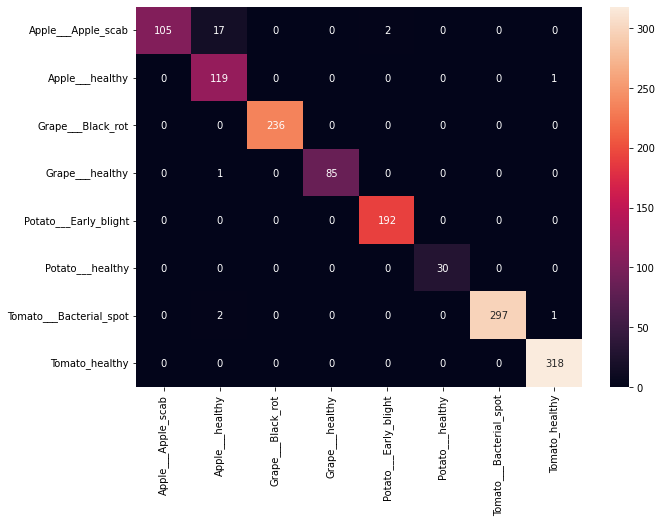

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test, y_pred)
classes=['Apple___Apple_scab', 'Apple___healthy', 'Grape___Black_rot','Grape___healthy','Potato___Early_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato_healthy']


df_cm = pd.DataFrame(cnf_matrix, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.savefig("TL2_Heatmap.png")

Following is our prediction:


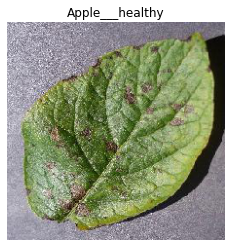

In [ ]:
from keras.preprocessing import image
image_path = "/content/drive/MyDrive/plant_dataset/Test/Potato___Early_blight/Potato___Early_blight__Test101.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255
li=['Apple___Apple_scab', 'Apple___healthy', 'Grape___Black_rot','Grape___healthy','Potato___Early_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato_healthy']
print("Following is our prediction:")
prediction = model.predict(img)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()


In [ ]:
model.save('TL2_model_final.h5')